<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 3.2</strong>
    </p>
</div>

In [1]:
# Import các thư viện 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Tải dataset Digits
digits = load_digits()
X, y = digits.data, digits.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

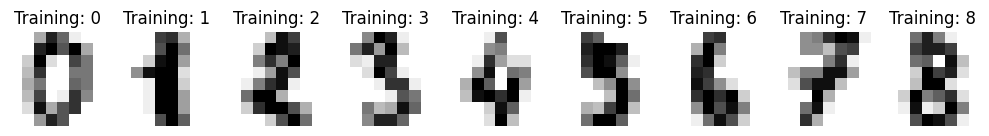

In [3]:
# Hiển thị một số mẫu dữ liệu ban đầu
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.tight_layout()
plt.show()

In [4]:
# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Sử dụng k=3
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Huấn luyện mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [5]:
# Phân tích kết quả
print("\nBáo cáo kết quả của KNN:")
print(classification_report(y_test, y_pred_knn))

print("\nBáo cáo kết quả của Logistic Regression:")

print(classification_report(y_test, y_pred_log_reg))


Báo cáo kết quả của KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Báo cáo kết quả của Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
          

In [6]:
# Đánh giá độ chính xác
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Độ chính xác của KNN: {accuracy_knn:.2f}")
print(f"Độ chính xác của Logistic Regression: {accuracy_log_reg:.2f}")

Độ chính xác của KNN: 0.99
Độ chính xác của Logistic Regression: 0.97


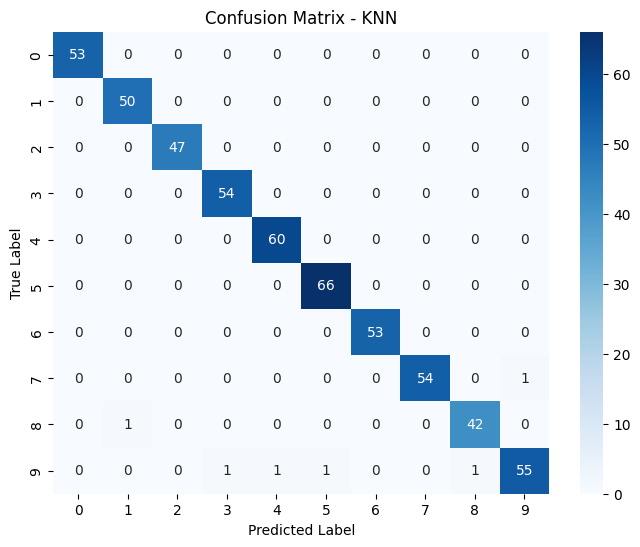

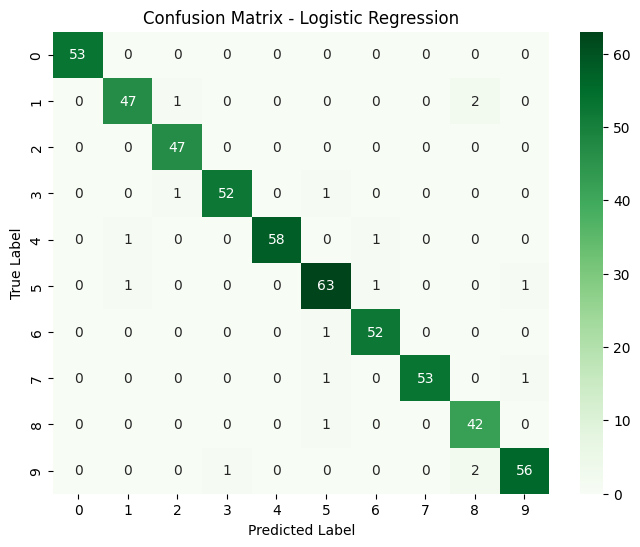

In [7]:
# Vẽ ma trận Confusion Matrix cho KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Vẽ ma trận Confusion Matrix cho Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Số mẫu nhận dạng sai của KNN nhưng đúng với Logistic Regression: 3
Số mẫu nhận dạng sai của Logistic Regression nhưng đúng với KNN: 14
Số mẫu nhận dạng sai của cả hai mô hình: 3


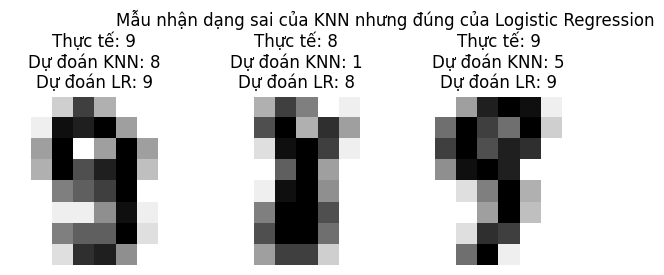

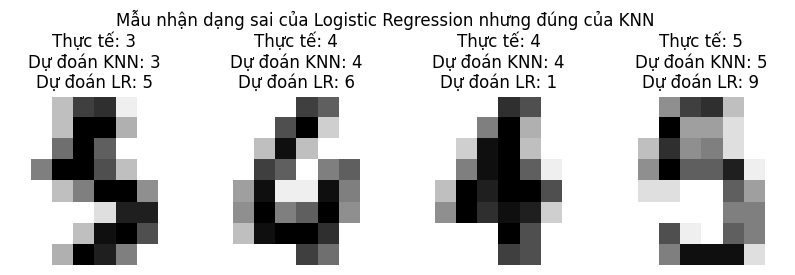

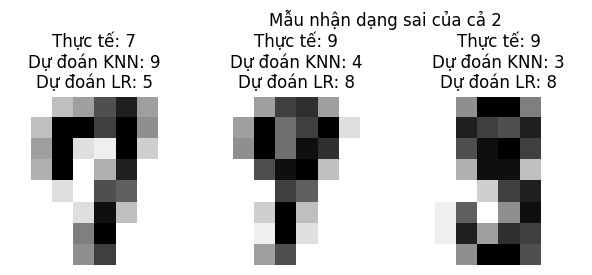

In [8]:
# Các mẫu nhận dạng sai của KNN nhưng đúng với Logistic Regression
knn_errors = np.where((y_pred_knn != y_test) & (y_pred_log_reg == y_test))[0]
print(f"\nSố mẫu nhận dạng sai của KNN nhưng đúng với Logistic Regression: {len(knn_errors)}")

# Các mẫu nhận dạng sai của Logistic Regression nhưng đúng với KNN
log_reg_errors = np.where((y_pred_log_reg != y_test) & (y_pred_knn == y_test))[0]
print(f"Số mẫu nhận dạng sai của Logistic Regression nhưng đúng với KNN: {len(log_reg_errors)}")

# Các mẫu nhận dạng sai của cả hai mô hình
both_errors = np.where((y_pred_knn != y_test) & (y_pred_log_reg != y_test))[0]
print(f"Số mẫu nhận dạng sai của cả hai mô hình: {len(both_errors)}")
# Hiển thị mẫu nhận dạng sai
def plot_samples(indices, title):
    plt.figure(figsize=(10, 3))
    for i, index in enumerate(indices[:4]):
        plt.subplot(1, 4, i + 1)
        plt.imshow(X_test[index].reshape(8, 8), cmap='gray_r')
        plt.title( f'Thực tế: {y_test[index]}\nDự đoán KNN: {y_pred_knn[index]}\nDự đoán LR: {y_pred_log_reg[index]}')
        plt.axis('off')
    plt.suptitle(title, y=1.05) 
    plt.subplots_adjust(top=0.85) 
    plt.show()
# Tìm các chỉ số nhận dạng sai của các mô hình
wrong_knn = [i for i in range(len(y_test)) if y_test[i] != y_pred_knn[i] and y_test[i] == y_pred_log_reg[i]]
wrong_log_reg = [i for i in range(len(y_test)) if y_test[i] != y_pred_log_reg[i] and y_test[i] == y_pred_knn[i]]
wrong_both = [i for i in range(len(y_test)) if y_test[i] != y_pred_knn[i] and y_test[i] != y_pred_log_reg[i]]

# Hiển thị các mẫu nhận dạng sai của KNN nhưng đúng của Logistic Regression
plot_samples(wrong_knn, 'Mẫu nhận dạng sai của KNN nhưng đúng của Logistic Regression')

# Hiển thị các mẫu nhận dạng sai của Logistic Regression nhưng đúng của KNN
plot_samples(wrong_log_reg, 'Mẫu nhận dạng sai của Logistic Regression nhưng đúng của KNN')

# Hiển thị các mẫu nhận dạng sai cho cả hai mô hình
plot_samples(wrong_both, 'Mẫu nhận dạng sai của cả 2')